<a href="https://colab.research.google.com/github/abdelmageed1/Linear_Regression/blob/Linear-Regression-from-scratch_Cars/cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
data = pd.read_csv('cars.csv')
data.head(10)

,enginesize,carlength,carwidth,carheight,price
0,130,168.8,64.1,48.8,13495
1,130,168.8,64.1,48.8,16500
2,152,171.2,65.5,52.4,16500
3,109,176.6,66.2,54.3,13950
4,136,176.6,66.4,54.3,17450
5,136,177.3,66.3,53.1,15250
6,136,192.7,71.4,55.7,17710
7,136,192.7,71.4,55.7,18920
8,131,192.7,71.4,55.9,23875
9,131,178.2,67.9,52.0,17859


In [ ]:
data.shape


(99, 5)

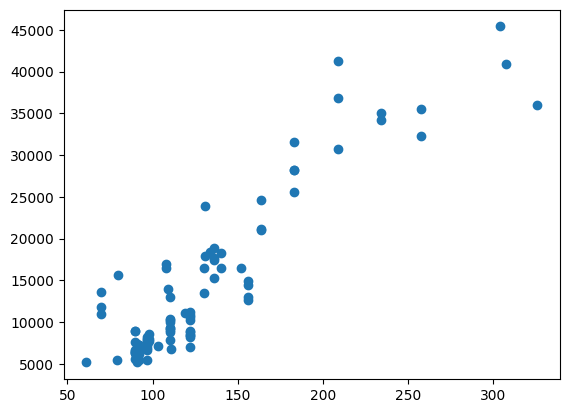

(99, 1)
(99,)


In [ ]:
# x = data[['enginesize' , 'carlength' ,'carwidth','carheight']].values #  لاكثر من متغير
x = data[['enginesize' ]].values

y = data['price'].values
plt.scatter(x,y)
plt.show()
print(x.shape)
print(y.shape)

In [ ]:
class LinearRegressionA :

  def __init__(self, l_rete=0.001 , iterations = 1000) -> None:
    self.l_rate = l_rete
    self.iterations = iterations


  def fitGD(self , x ,y):
    # empty list to store cost
    self.cost = []
    # initalize theta
    self.theta = np.zeros((1 + x.shape[1]))
    # num of row in data tranning 99
    n = x.shape[0]

    for i in range(self.iterations):
      # h(x) = theta_0 + theta_1 * x1 + theta_2 * x2
      #  x = (99,2)
      y_pred  = self.theta[0] + np.dot(x , self.theta[1:])

      # compute error fun using Mean Squre Error
      mse = (1/n) * np.sum((y_pred - y )**2)

      # set vaule of error in cost list
      self.cost.append(mse)


      d_theta1 = (1/n) * np.dot(x.T , (y_pred - y)) # x.T = (2,99) (y_pred - y ) = (99,1)
      d_theta0 = (1/n) * np.sum(y_pred - y)


      # theta = theata - l_rate * الاشتقاق

      self.theta[1:] = self.theta[1:] - self.l_rate *d_theta1
      self.theta[0] =  self.theta[0] - self.l_rate *d_theta0

    return self

  def predictGD(self, x):
        return self.theta[0] + np.dot(x, self.theta[1:])






In [ ]:

def scale(x):
    x_scaled = x - np.mean(x, axis=0)
    x_scaled = x_scaled / np.std(x_scaled, axis=0)
    return x_scaled



In [ ]:

x_sd= scale(x)


lr = LinearRegressionA()
lr.fitGD(x_sd, y)


In [ ]:
print("theta_0= ", lr.theta[0])
print("theta_1= ", lr.theta[1])
# print("theta_2= ", lr.theta[2])
# print("theta_3= ", lr.theta[3])

theta_0=  8778.239709500398
theta_1=  5549.490753436327


In [ ]:
y_pred = lr.predictGD(x_sd)

y_pred = lr.predictGD(.1)
print(y_pred)



[9333.18878484]
